<a href="https://colab.research.google.com/github/ChiaraAlba/Decision-Tree/blob/master/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

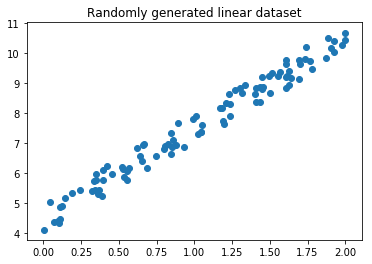

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.scatter(X,y)
plt.title('Randomly generated linear dataset')
plt.show()

# Normal Equation
## Closed-form solution
This equation allows us to find the value of theta minimising the MSE (mean square error) given a linear regression hypothesis

$ \Theta_{opt} = (X^T \cdot  X)^{-1}  \cdot X^T \cdot y $



In [3]:
X_complete = np.c_[np.ones((100,1)), X]  # We add a column of ones (c_[] to add c) to X
theta_opt = np.linalg.inv(X_complete.T.dot(X_complete)).dot(X_complete.T).dot(y)
theta_opt

array([[4.48988843],
       [3.00891729]])

Our linear hypothesis was given by:

$ y = 4 + 3 x + Gaussian\,noise$

Therefore $\theta_1 = 4$ and $\theta_2 = 3$. Our optimal values for $\Theta$ are close enough.
With $\Theta_{opt}$ we can now make predictions.

In [0]:
X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), X_new]

y_predict = X_new.dot(theta_opt)

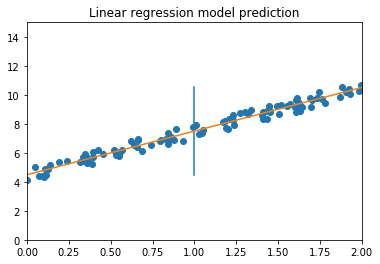

In [5]:
plt.scatter(X, y)
plt.plot(X_new, y_predict)
plt.axis([0,2,0,15])
plt.title('Linear regression model prediction')
plt.show()

###Equivalently using Scikit-Learn



In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_  # It produces separately the bias term (called intercept) and the coefficients

(array([4.48988843]), array([[3.00891729]]))

In [7]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[ 4.48988843],
       [10.50772301]])

 # Batch Gradient Descent
 
$ \Theta^{n+1} = \Theta^{n} - \eta \nabla_{\Theta}MSE(\Theta^n)$

$\eta$ is the **learning rate**

In [8]:
eta = [0.02, 0.1, 0.5]
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) 

for iteration in range(n_iterations):
  gradients = 2/m * X_complete.T.dot(X_complete.dot(theta) - y)
  theta = theta - eta[1] * gradients
  
theta

array([[4.48988843],
       [3.00891729]])

#### Gradient Descent using three different values for the learning rate

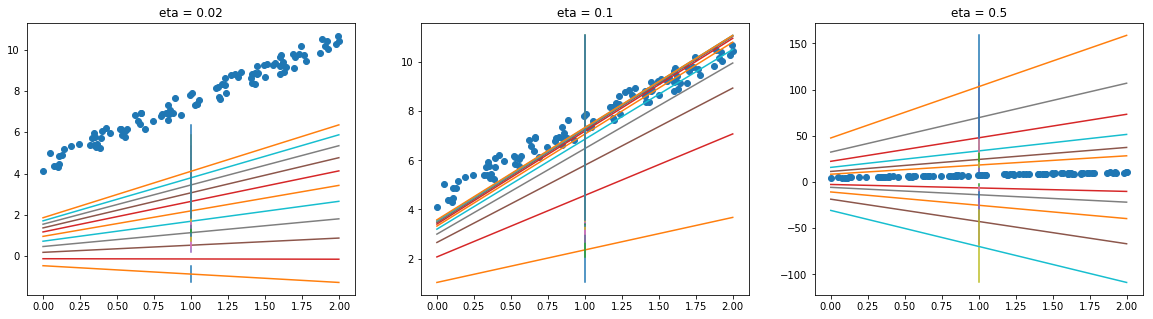

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), X_new]
theta_r = np.random.randn(2,1)

for j in range(len(eta)):
  fig = ax[j].scatter(X,y)
  theta = theta_r
  ax[j].set_title('eta = {}'.format(eta[j]))
  for iteration in range(11):
    gradients = 2/m * X_complete.T.dot(X_complete.dot(theta) - y)
    theta = theta - eta[j] * gradients
    y_predict = X_new.dot(theta)
    fig = ax[j].plot(X_new, y_predict)

# Stochastic Gradient Descent

At every step in our iterations, we pick only one randomly chosen instance and calculate the gradient only based on that single instance.

**+:** 
- the randomness is good to escape local minima with very irregular cost functions
- good for huge training sets
          
**-:** 
- The algorithm will never settle at the global minimum, but will continue to bounce around it

Tecnique called *simulated annealing*: gradually reduces the learning rate, so that at the beginning is big to jump out local minima and later it gets smaller and smaller to help settling down

In [10]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t1 + t)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_complete[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    
theta

array([[4.4920501 ],
       [3.01069942]])

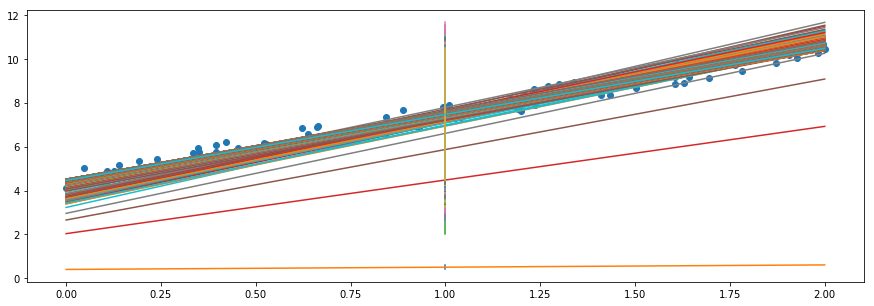

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
fig = ax.scatter(X,y)

X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), X_new]

theta = np.random.randn(2,1)

for epoch in range(11):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_complete[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    y_predict = X_new.dot(theta)
    fig = ax.plot(X_new, y_predict)

  

With Scikit-Learn

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1 )    # 50 epochs, no penalty therefore no regularization, starting eta given
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.47526974]), array([3.02922353]))

##Mini-batch Gradient Descent

At each step it computes the gradients on small random groups of instances, said *mini-batches*.



#Polynomial Regression

Useful to fit more complex data with a linear model.

The idea is to add powers of each feature as new features and train a linear model with this extended set of features.

Let's generate non-linear data:

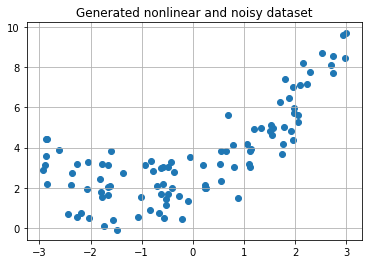

In [13]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)
plt.title('Generated nonlinear and noisy dataset')
plt.grid(True)
plt.show()

Let's start preprocessing the data, using a Scikit-Learn method. We want to take second powers (because our data is quadratic) of our features.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)

print(X[0],'\n', X_poly[0])

[-0.56487159] 
 [-0.56487159  0.31907991]


We can use these extended features to fit a LinearRegression model already imported from Scikit-Learn

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([2.31478845]), array([[1.01041025, 0.44788831]]))

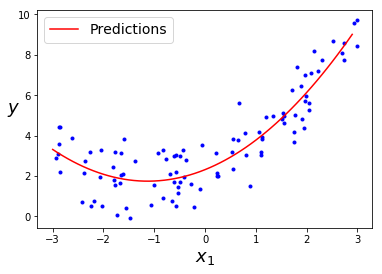

In [16]:
X_new = np.arange(-3, 3, 0.1) 
y_predict = lin_reg.coef_[0][1]  * X_new**2 + lin_reg.coef_[0][0] * X_new + lin_reg.intercept_
plt.plot(X,y, 'b.')
plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.legend(loc = 0, fontsize = 14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Now we compare a Polynomial Regression of higher order. Increasing the order, we'll be considering higher powers and therefore the normalization/scale of the features becomes fundamental. To this end, we use the **Pipeline class** from Scikit-Learn, which accomplishes all the data transformation steps in the right order.

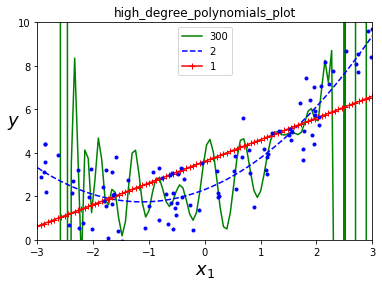

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

X_new=np.linspace(-3, 3, 100).reshape(100, 1)

for style, degree in (('g-', 300), ('b--', 2), ('r-+', 1)):
  poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  poly_reg = Pipeline([
      ("poly_features", poly_feat),
      ('std_scaler', std_scaler),
      ('lin_reg', lin_reg)
  ])
  poly_reg.fit(X, y)
  y_new = poly_reg.predict(X_new)
  plt.plot(X_new, y_new, style, label = str(degree))
  
plt.plot(X, y, "b.")
plt.legend(loc=0)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("high_degree_polynomials_plot")

plt.show()

The 300-degrre polynomial model wiggles around to fit as precisely as possible all the training instances, but this is clearly a case of overfitting as it will be shown by the learnign curves. On the contrary the linear model is clearly underfitting the data.

#Learning Curves

**overfitting**: a model performing well on the training set, but generalising poorly (according to the cross-validation techniques).

**underfitting**: a model performing poorly both on the training set and on generalisation.

A way to understand if our model is too complex (overfitting) or too simple (underfitting) is to look at *learning curves*.

**learning curves:** plots of the model's performances on the training set and on the validation set as a function of the training set size or the training iterations. To get these plots we need to train the model several times on different sized subsets of the training set.





In [0]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1,len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), 'r-+', label = 'Training set')
  plt.plot(np.sqrt(val_errors), 'b-', label = 'Validation set')
  plt.title('Learning Curves')  
  plt.xlabel('Training set size', fontsize = 14)
  plt.ylabel('RMSE', fontsize = 14)
  plt.legend(loc = 0)
  plt.axis([0, 80, 0, 3])
  plt.show()

Below a typical example of learning curves of an underfitting model:  they both reach a plateau, they are close and fairly high.

**If a model is underfitting the data, adding more training examples will not help. We need to consider a more complex model or to find more suitable features**

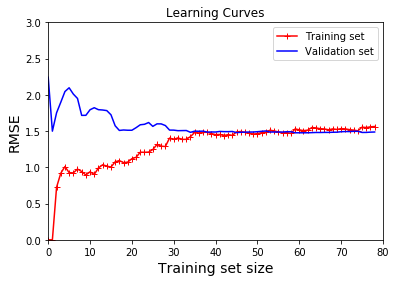

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


Let's what happens with a $10^{th}$-degree polynomial regression model

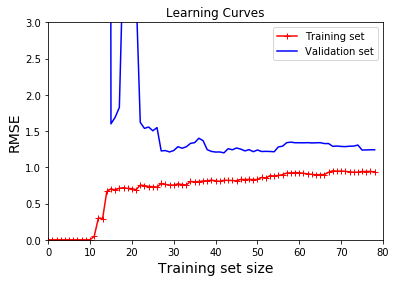

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)


There are two main differences between the two plots:
- The error on the training data is lower with the Polynomial regression model
- With the poly reg model, there's a gap between the two curves, meaning it fits much better the training data than the test data. This is a characteristc of an overfitting model. If we added more and more training examples the gap between the two curves would get smaller.

## General aspects of model's generalization error:

**Bias:** wrong assumptions. A model with high-bias tends to underfit. 

**Variance:** excessive sensitivity to small variations, too many degrees of freedom. A model with high variance tends to overfit the data.

**Irreducible error:** Due to the noiseness of the data itself.

#Regularized Linear Models

Regularize a model (adding constraints) is a way to reduce overfitting.

With a polynomial model we can reduce the polynomial degree.

With a linear model regularization is achieved by constraining the weights.

## Ridge Regression

*During the training*, we add a **regularization term** to the cost function of the form:

$\alpha\sum_{i=1}^n \theta_i^{2 }$.

**$\alpha$**  is the hyperparameter controlling how much we regularize the model. The sum is nothing more than the $l_2$-norm of the weight vector.

**Ridge Regression cost function:**

$ J(\Theta) = MSE(\Theta) + \alpha\sum_{i=1}^n \theta_i^{2 }.$

**NB:**  - We are not regularing the bias term, infact the sum starts from 1.
- It is important to scale the date before performing the regularization.

**Ridge Regression closed-form solution:**

$\hat\Theta = (X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y$,

where $A$ is the identity matrix with a zero in position (1,1).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


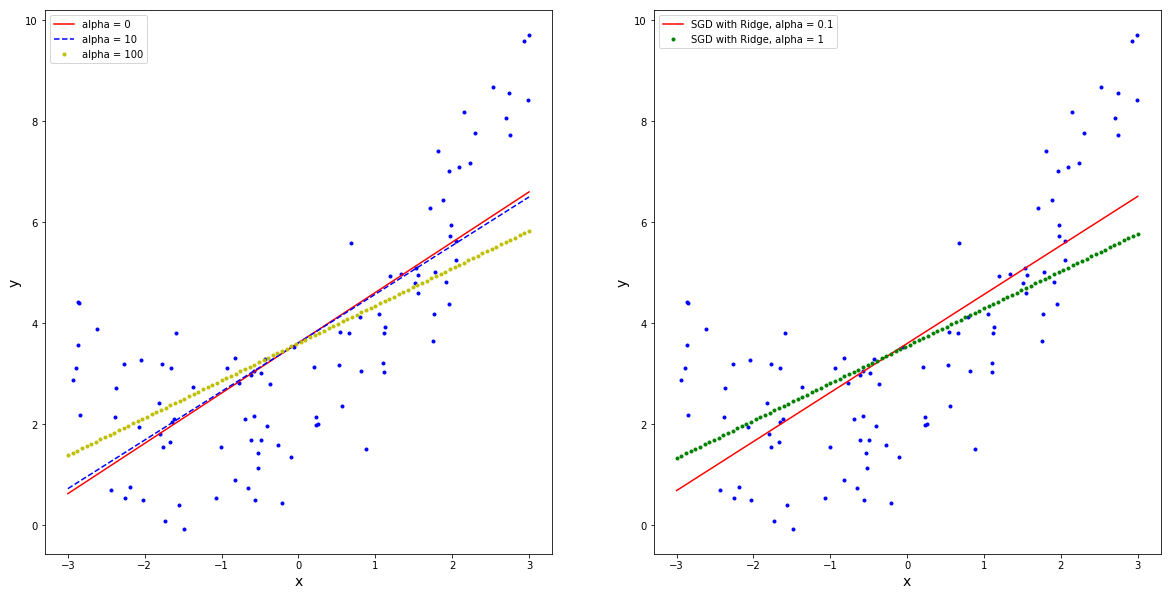

In [21]:
from sklearn.linear_model import Ridge

X_new = np.linspace(-3,3,100).reshape(100,1)
  
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
 
ax[0].plot(X, y, 'b.')
ax[1].plot(X, y, 'b.')


def batch_ridge(alpha, X, y, X_new):
  ridge_reg = Ridge(alpha = alpha, solver = 'cholesky')
  ridge_reg.fit(X,y)
  return ridge_reg.predict(X_new)

def SGD_ridge(X, y, X_new, alpha = 0.1):
  sgd_reg = SGDRegressor(penalty = 'l2', alpha=alpha)
  sgd_reg.fit(X, y)
  return sgd_reg.predict(X_new)


for alpha, style, label in ((0,'r-', 'alpha = 0'), (10, 'b--', 'alpha = 10'), (100, 'y.', 'alpha = 100')):
  y_predict_batch = batch_ridge(alpha, X, y, X_new)
  ax[0].plot(X_new, y_predict_batch, style, label = label)
  ax[0].legend(loc = 0)
  ax[0].set_xlabel('x', fontsize=14)
  ax[0].set_ylabel('y', fontsize=14)
  
  
y_predict_SGD = SGD_ridge(X, y, X_new)
ax[1].plot(X_new, y_predict_SGD, 'r-', label = 'SGD with Ridge, alpha = 0.1')
ax[1].legend(loc = 0)
ax[1].set_xlabel('x', fontsize=14)
ax[1].set_ylabel('y', fontsize=14)

y_predict_SGD = SGD_ridge(X, y, X_new, alpha = 1)
ax[1].plot(X_new, y_predict_SGD, 'g.', label = 'SGD with Ridge, alpha = 1')
ax[1].legend(loc = 0)
ax[1].set_xlabel('x', fontsize=14)
ax[1].set_ylabel('y', fontsize=14)


plt.show()
  

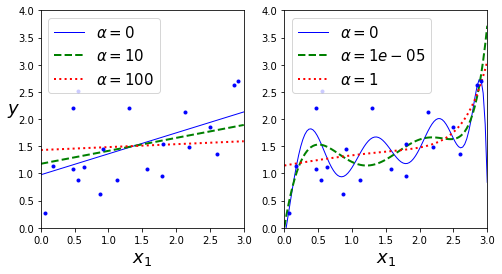

In [22]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

##Lasso Regression
###Least Absolute Shrinkage and Selection Operator Regression

$J(\Theta) = MSE + \color{red}{\alpha \sum_{i=1}^n |\theta_i|}$

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


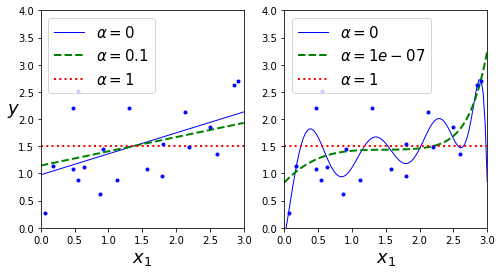

In [25]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.10, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

##Elastic Net
Mix of both Ridge Regression and Lasso.


$J(\Theta) = MSE + \color{red}{r}{\alpha \sum_{i=1}^n |\theta_i|} +  \color{red}{\frac{1 - r}{2}}\alpha\sum_{i=1}^n \theta_i^{2 }$.

In general it's preferable to avoid plain linear regrassion and have some regularization. Ridge is a good default one, but eleastic net or lasso are good to reduce the useless features' weights down to zero, when we suspect that there are only a few useful features.


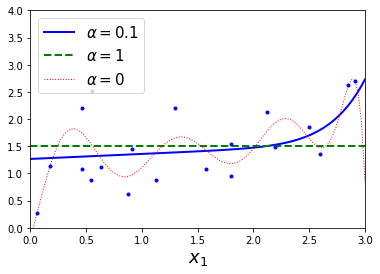

In [28]:
from sklearn.linear_model import ElasticNet

plot_model(ElasticNet, polynomial=True, alphas=(0.1, 1, 0), random_state=42, l1_ratio =0.9)

##Early Stop
